# **OpenCV for Computer Vision - Part 1**

OpenCV, or Open Source Computer Vision Library (opencv.org), is a free, open-source software library for computer vision and machine learning. It's used to develop applications for image and video processing, object detection, and more.
OpenCV has over 2500 optimized algorithms that can be used for face recognition, object detection, video processing, 3D modeling, handwritten text recognition etc. It uses GPU (graphical processing units) to speed up tasks that are computationally intensive. OpenCV can be integrated with other Python libraries like NumPy (Numerical Python)


All images consists of a set of pixels. A pixel is considered the ‘color’ or ‘intensity of light’ in our image. Most
pixels in images are represented in 2 ways; 1. Grayscale / single color channel pixel, 2. Colored pixel.
In a grayscale image, each pixel is a scalar value between 0 and 255, where zero corresponds to “black” and
255 being “white”. Values between 0 and 255 are varying shades of gray, where values closer to 0 are darker
and values closer to 255 are lighter. Grayscale images has only 1 color channel.
nsity.

Color pixels are usually represented in the RGB color space. So, there are 3 color channels. Thus, pixels in the
color images are represented by a list of 3 values, 1 for the Red component, 1 for Green, and the last for Blue
component. In one pixel of a color image, each of this Red, Green, and Blue channel can have values in the
range [0,255], with 0 indicating no color of that component, and 255 represent full color of that component.
Thus, a color pixel is a tuple in the form (red, green, blue). A pure black pixel is represented as (0,0,0), while a
pure white pixel is (255, 255, 255). A pure red pixel is (255, 0, 0). We normally use 8-bit unsigned integers to
represent the intensity.

An image is thus defined as an array of C X W X H, where C is the number of color channel, W is the width,
and H is the height. For a grayscale image, C = 1, and for a color image, C = 3.

In [ ]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import sys
import os
import numpy as np

<h2>1. Reading and Writing Images</h2>

In [ ]:
%run modularCode/read_write_images.ipynb

Note. When you have multiple ipynb files, you can run one file inside another using the %run command like above. I am not sure if this works in Google Collab. You may check. Why did I write this modular code? Answer. You may need to write many functions in longer projects. It is always good to write codes in modular fashion. While the rest of the codebook is written as a plain python notebook, I wanted to show you atleast one modular coding example, in case you are not familiar already.

In [ ]:
input_folder = os.path.join("input")
output_folder = os.path.join("output")

In [ ]:
# reading and writing images
image_path = os.path.join(input_folder, "./test.jpg")
read_write_obj = ReadWriteDisplay(image_path)
read_write_obj.show()
read_write_obj.read()
read_write_obj.write()

Shape of the image: (280, 390, 3)
Shape of the grayscale image: (280, 390)


In [ ]:
# same code, simpler version, if you are not using any image path
# it is always good to know how to use image path, because for larger image datasets,
# you may have to use them from different locations
read_write_obj = ReadWriteDisplay("input/test0.jpg")
read_write_obj.show()
read_write_obj.read()
read_write_obj.write()

Shape of the image: (1310, 736, 3)
Shape of the grayscale image: (1310, 736)


In [ ]:
# directly reading using OpenCV imread()
image1 = cv2.imread("input/test0.jpg")
print(image1.shape)
(b,g,r) = image1[100,100]
print("Pixel at (100,100) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

(1310, 736, 3)
Pixel at (100,100) - Red: 213, Green: 228, Blue: 249


It is important to notice that Python’s OpenCV stores RGB channel as BGR. This might not be the case for other platforms.

<h2>2. Add and Subtract images - both should be of same size</h2>

In [ ]:
img1=cv2.imread("input/test1.jpg")
cv2.imshow("Image1", img1)
if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
# keyboard key 27 is the Esc key, you can check the rest at https://asawicki.info/nosense/doc/devices/keyboard/key_codes.html

In [ ]:
img2=cv2.imread("input/test0.jpg")
cv2.imshow("Image2", img2)
if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()

In [ ]:
print(img1.shape)
print(img2.shape)

(736, 736, 3)
(1310, 736, 3)


See the 2 images are of different resolution. So, before adding or subtracting them like NumPy arrays, you have to resize them. We do it using OpenCV resize() function.

In [ ]:
image_src = cv2.resize(img1, (500, 500))
image_dest = cv2.resize(img2, (500, 500))

In [ ]:
weightedSum = cv2.addWeighted(image_src, 0.5, image_dest, 0.2, 0)
cv2.imwrite(os.path.join(output_folder, "addition.jpg"), weightedSum)

True

In [ ]:
subtract_image = cv2.subtract(image_src, image_dest)
cv2.imwrite(os.path.join(output_folder, "substraction.jpg"), subtract_image)

True

<h2>3. Color Space and changing Color Space</h2>

Color spaces are a way to represent the color channels present in the image that gives the image that particular hue. There are several different color spaces and each has its own significance. Some of the popular color spaces are RGB (Red, Green, Blue), CMYK (Cyan, Magenta, Yellow, Black), HSV (Hue, Saturation, Value), etc. <br>BGR color space: OpenCV’s default color space is RGB. However, it actually stores color in the BGR format. It is an additive color model where the different intensities of Blue, Green and Red give different shades of color.

HSV color space: It stores color information in a cylindrical representation of RGB color points. It attempts to depict the colors as perceived by the human eye. Hue value varies from 0-179, Saturation value varies from 0-255 and Value value varies from 0-255. It is mostly used for color segmentation purpose.

CMYK color space: Unlike, RGB it is a subtractive color space. The CMYK model works by partially or entirely masking colors on a lighter, usually white, background. The ink reduces the light that would otherwise be reflected. Such a model is called subtractive because inks “subtract” the colors red, green and blue from white light. White light minus red leaves cyan, white light minus green leaves magenta, and white light minus blue leaves yellow.

Source: https://www.geeksforgeeks.org/color-spaces-in-opencv-python/

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [ ]:
# convert bgr to hsv
hsvImage = cv2.cvtColor(image_dest, cv2.COLOR_BGR2HSV)
cv2.imwrite(os.path.join(output_folder, "bgr2hsv.jpg"), hsvImage)

True

In [ ]:
# convert bgr to grey (UK) /gray (US)
grayImage = cv2.cvtColor(image_dest, cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(output_folder, "bgr2gray.jpg"), grayImage)

True

In [ ]:
# track one color channel, say Blue
"""tracks blue color,first convert into hsv and then we go bitwise and to detect the blue"""

# step 1. conversion in HSV color space
blue_cap=cv2.imread("input/blue_cap.jpg")
hsvBlue_cap = cv2.cvtColor(blue_cap, cv2.COLOR_BGR2HSV)

# step 2. defining blue in hsv space; for different colors, please search google or color space documentation
lower_blue = np.array([25, 50, 50])   # blue has a lower boundary of 25-50
upper_blue = np.array([130, 255, 255]) # blue upper boundary is 130-255

# stap 3. define a mask that picks blue using the defined color range in the previous step
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsvBlue_cap, lower_blue, upper_blue)

# step 4. do Bitwise-AND using the mask on the original image
onlyBlueImage = cv2.bitwise_and(blue_cap, blue_cap, mask=mask)
# In bitwise AND, only 1 and 1 is 1; here 1 is blue (the range above)
cv2.imwrite(os.path.join(output_folder, "only_blue.jpg"), onlyBlueImage)


True

<h2>4. Image Thresholding</h2>

Image Thresholding is an intensity transformation function in which the values of pixels below a particular threshold are reduced, and the values above that threshold are boosted.  This generally results in a bilevel image at the end, where the image is composed of black and white pixels. Thresholding belongs to the family of point-processing techniques. <br>In these articles, you will learn how to perform Image Thresholding in OpenCV. <br>https://www.geeksforgeeks.org/image-thresholding-in-python-opencv/   <br>https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/  <br>https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/?ref=next_article  <br>https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/?ref=next_article

This technique is widely used in various applications such as object detection, image segmentation, and character recognition, enabling efficient analysis and interpretation of digital images. Additionally, image thresholding can enhance image quality by reducing noise and improving overall visual clarity

In [ ]:
# Binary thresholding
""" options can be
            cv2.THRESH_BINARY
            cv2.THRESH_BINARY_INV
            cv2.THRESH_TRUNC
            cv2.THRESH_TOZERO
            cv2.THRESH_TOZERO_INV
"""
blue_cap=cv2.imread("input/blue_cap.jpg")
ret, thresholdImage = cv2.threshold(blue_cap, 127, 255, cv2.THRESH_BINARY)
# Thresholding the image placing 127 intensity level as threshold
# Pixel values below 127 would be changed to Black
# Pixel values above 127 would be changed to White (255)
cv2.imwrite(os.path.join(output_folder, "binary_threshold.jpg"), thresholdImage)
# Displaying the output image
#cv2.imshow('Binary Threshold', thresholdImage)

True

In [ ]:
# Adaptive thresholding
""" If an image has different lighting conditions in different areas, this algorithm determines
        the threshold for a pixel based on a small region around it """
"""Threshold can be calculated as given two methods:
         1) cv2.ADAPTIVE_THRESH_MEAN_C: The threshold value is
                the mean of the neighbourhood area minus the constant C.
         2) cv2.ADAPTIVE_THRESH_GAUSSIAN_C:The threshold
                value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
"""
blue_cap=cv2.imread("input/blue_cap.jpg")
#cv2.imshow("Image2", blue_cap)
#if cv2.waitKey(0) & 0xff == 27:
#            cv2.destroyAllWindows()
#img = cv2.medianBlur(blue_cap, 5)
img = cv2.cvtColor(blue_cap, cv2.COLOR_BGR2GRAY)
thImage2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite(os.path.join(output_folder, "adaptive_threshold.jpg"), thImage2)

True

In [ ]:
# Otsu binarization
"""Consider an image with only two distinct image values (bimodal image), where the histogram would only
        consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method
        determines an optimal global threshold value from the image histogram """

# Otsu's thresholding after Gaussian filtering
blue_cap=cv2.imread("input/blue_cap.jpg")
#blur = cv2.GaussianBlur(blue_cap, (5, 5), 0)
blur = cv2.cvtColor(blue_cap, cv2.COLOR_BGR2GRAY)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite(os.path.join(output_folder, "otsu_binarized_threshold.jpg"), th3)

True

Note:

<h2>5. Smoothing Images</h2>

When we are dealing with images at some points the images will be crisper and sharper which we need to smoothen or blur to get a clean image, or sometimes the image will be with a really bad edge which also we need to smooth it down to make the image usable. In OpenCV, we got more than one method to smooth or blur an image, let’s discuss them one by one. https://www.geeksforgeeks.org/python-opencv-smoothing-and-blurring/

Another resource: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html#:~:text=Gaussian%20blurring%20is%20highly%20effective,5%2C5)%2C0)

https://www.tutorialspoint.com/opencv/


In [ ]:
#2D convolution
# Please learn this from the website link above, please note that Kernel is just a numeric matrix


In [ ]:
#averaging as numpy array
blue_cap=cv2.imread("input/blue_cap.jpg")
kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(blue_cap, -1, kernel)

cv2.imwrite(os.path.join(output_folder, "averaged_numpy.jpg"), dst)

True

In [ ]:
#averaging by cv2 directly (same effect as the previous)
blur = cv2.blur(blue_cap, (5, 5))

cv2.imwrite(os.path.join(output_folder, "averaged_blur.jpg"), blur)

True

In [ ]:
#gaussian blur
"""instead of box kernel, gaussian kernel is used to blur the image"""
""" width and height of the kernel which should be positive and odd."""
"""sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX.
   If both are given as zeros, they are calculated from the kernel size """

blur = cv2.GaussianBlur(blue_cap, (5, 5), 0)

cv2.imwrite(os.path.join(output_folder, "gaussian_blur.jpg"), blur)

True

In [ ]:
#median blur
""" median of all the pixels under the kernel area and the central element is
    replaced with this median value"""
"""highly effective in salt and pepper noise (also known as impulse noise, is a form of noise sometimes seen on digital images.
    For black-and-white or grayscale images, is presents as sparsely occurring white and black pixels,
    giving the appearance of an image sprinkled with salt and pepper.)

    Kernel size should be odd number"""

median = cv2.medianBlur(blue_cap, 5)

cv2.imwrite(os.path.join(output_folder, "median_blur.jpg"), median)

True

In [ ]:
#bilateral blur
"""highly effective in noise removal while keeping edges sharp"""
"""Gaussian blurs the edges also,bilateral doesn't ,this is why it is kind of slow to gaussian"""
"""
        d: diameter of each pixel neighborhood that is used during filtering
        sigmaColor: Filter sigma in the color
        space. A larger value of the parameter means that farther colors within the pixel neighborhood.
        sigmaSpace:Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels
            will influence each other as long as their colors are close enough """

b_blur = cv2.bilateralFilter(blue_cap, 9, 75, 75)

cv2.imwrite(os.path.join(output_folder, "bilateral_blur.jpg"), b_blur)

True

Note. When to use what?

<h2>6. Morphological Transformation of Images </h2> <br>(Morphology means the study of form, shape, structure)

Python OpenCV Morphological operations are one of the Image processing techniques that processes image based on shape. This processing strategy is usually performed on binary images. Morphological operations based on OpenCV are as follows:
Erosion,Dilation,Opening,Closing, Morphological Gradient,Top hat,Black hat

For all the above techniques the two important requirements are the binary image and a kernel structuring element that is used to slide across the image. https://www.geeksforgeeks.org/python-opencv-morphological-operations/lack hat

In [ ]:
# erosion
#erodes away the boundaries of foreground object (Always try to keep foreground in white).
blue_cap=cv2.imread("input/noise.png")
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(blue_cap, kernel, iterations=1)
cv2.imwrite(os.path.join(output_folder, "eroded_image.jpg"), erosion)

True

In [ ]:
# dilation (the action or condition of becoming or being made wider, larger, or more ope)
#It increases the white region in the image or size of foreground object increases
blue_cap=cv2.imread("input/noise.png")
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.erode(blue_cap, kernel, iterations=1)
cv2.imwrite(os.path.join(output_folder, "dilated_image.jpg"), dilation)

True

In [ ]:
# opening
# Opening is the 2 operations above together (erosion followed by dilation). It is useful in removing noise
blue_cap=cv2.imread("input/noise.png")
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(blue_cap, cv2.MORPH_OPEN, kernel)
cv2.imwrite(os.path.join(output_folder, "opened_image.jpg"), opening)

True

In [ ]:
# closing
# Closing is reverse of Opening, Dilation followed by Erosion.
# It is useful in closing small holes inside the foreground objects, or small black points on the object.
blue_cap=cv2.imread("input/noise.png")
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(blue_cap, cv2.MORPH_CLOSE, kernel)
cv2.imwrite(os.path.join(output_folder, "opened_image.jpg"), closing)

True

In [ ]:
# getting structuring element
# get structuring  element to work on above morphological operation if required
def get_structuring_element(self):
    """get structuring  element to work on above morphological operation if required"""
    rect_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    print(rect_element)
    elliptical_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    print(elliptical_element)

In [ ]:
image_path_src = os.path.join(input_folder, "test.jpg")
morpho_obj = image_path_src
get_structuring_element(morpho_obj)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


When we do not want to use kernels of fixed size, then we can use such structuring elements on the image.

.

<h2>7. Canny Edge Detection</h2>

Canny Edge detection is an Algorithm consisting of 4 major steps: Reduce Noise using Gaussian Smoothing. Compute image gradient using Sobel filter. Apply Non-Max Suppression or NMS to just jeep the local maxima. https://www.geeksforgeeks.org/python-opencv-canny-function/

In [ ]:
blue_cap=cv2.imread("input/blue_cap.jpg")
old_car=cv2.imread("input/noise.png")
edges_blueCap = cv2.Canny(blue_cap, 50, 200)
cv2.imwrite(os.path.join(output_folder, "edges_blueCap.jpg"), edges_blueCap)
edges_oldCar = cv2.Canny(old_car, 50, 200)
cv2.imwrite(os.path.join(output_folder, "edges_oldCar.jpg"), edges_oldCar)

True

Canny() Parameters

cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

Where:
<br>Image: Input image to which Canny filter will be applied;
<br>T_lower: Lower threshold value in Hysteresis Thresholding;
<br>T_upper: Upper threshold value in Hysteresis Thresholding;
<br>aperture_size: Aperture size of the Sobel filter;
<br>L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.

<h2>8. Template Matching</h2>

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2. matchTemplate() for this purpose. https://www.geeksforgeeks.org/template-matching-using-opencv-in-python/

In [ ]:
original=cv2.imread("input/form-whole.png")
# Convert it to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

template=cv2.imread("input/form-part.png",0)

w, h = template.shape[::-1]


#res = cv2.matchTemplate(original_gray, template, cv2.TM_CCOEFF)
res = cv2.matchTemplate(original_gray, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# draw a bounding box around the detected result and write the image
cv2.rectangle(original, top_left, bottom_right, 255, 2)
cv2.imshow("Image", original)  # show the output
cv2.waitKey(0)
cv2.imwrite(os.path.join(output_folder, "template_found.jpg"), original) # write the output in a file
cv2.destroyWindow('Image')

True

Limitations of Template Matching:

Pattern occurrences have to preserve the orientation of the reference pattern image(template)
As a result, it does not work for rotated or scaled versions of the template as a change in shape/size/shear, etc. of object w.r.t. the template will give a false match.
The method is inefficient when calculating the pattern correlation image for medium to large images as the process is time-consuming.
To avoid the issue caused by the different sizes of the template and original image we can use multiscaling. In the case where, just because the dimensions of your template do not match the dimensions of the region in the image you want to match, does not mean that you cannot apply template matching.

<h3>8.1 Multiscale Template matching</h3>

The process of Multi scaling is as follows:

Loop over the input image at multiple scales (i.e. make the input image progressively smaller and smaller).
Apply template matching using cv2.matchTemplate and keep track of the match with the largest correlation coefficient (along with the x, and y-coordinates of the region with the largest correlation coefficient).
After looping over all scales, take the region with the largest correlation coefficient and use that as your “matched” region.

In [ ]:
#!pip install imutils
import imutils

In [ ]:

original1=cv2.imread("input/test0.jpg")
# Convert it to grayscale
original_gray1 = cv2.cvtColor(original1, cv2.COLOR_BGR2GRAY)

template11 = cv2.imread("input/test0_template.png", 0)
template1 = cv2.Canny(template11, 50, 200)    # detect the canny edges
(tH, tW) = template11.shape[:2]               # find the template shape

found = None
# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(original_gray1, width=int(original_gray1.shape[1] * scale))
    r = original_gray1.shape[1] / float(resized.shape[1])
            # if the resized image is smaller than the template, then break
            # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
                # detect edges in the resized, grayscale image and apply template
                # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template1, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

            # if we have found a new maximum correlation value, then update
            # the bookkeeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
        # unpack the bookkeeping variable and compute the (x, y) coordinates
        # of the bounding box based on the resized ratio

(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

# draw a bounding box around the detected result and display the image
cv2.rectangle(original1, (startX, startY), (endX, endY), (0, 0, 255), 2)
cv2.imshow("Image", original1)
cv2.waitKey(0)
cv2.imwrite(os.path.join(output_folder, "template_found1.jpg"), original1) # write the output in a file
cv2.destroyWindow('Image')

True

Note: So template matching is used for finding a portion of the image (template) in the full image. In the first example, we found the form header (that contains the applicant information) from the full form. Imagine, you have 1000 such form (filled in), and you may take only this part and use OCR (Optical Character Recognition) to extract participant data and put those into a CSV file.
<br>The problem of the 1st part is that the template size and orientation has to match the size and orientation on the full image. So, when we have such a problem, we use the second part - Multiscale template matching. For example, if you need to match product brand logos of different sizes on many shop pictures to understand which shops sell which brands of items!

<h2>9. Houghline method for line detection</h2>

The Hough Transform is a method that is used in image processing to detect any shape, if that shape can be represented in mathematical form. It can detect the shape even if it is broken or distorted a little bit.

This keeps a track of all the curve intersections. First we use an edge detection technique (like, we used Canny above). Then, if the number of intersection is above some threshold, then we select that shape (line or circle etc.)

In [ ]:
# hough line detection based out of canny edge detection

imageSample=cv2.imread("input/test0.jpg")
gray = cv2.cvtColor(imageSample, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# Increase the Aperture size if want to detect more detailed features

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
# threshold (min number of intersections to be considered as a line) = 200
# you may need to change this depending on images
# change this value to see how the output changes!
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    rho, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imshow("Image", edges)
cv2.waitKey(0)
cv2.imwrite(os.path.join(output_folder, "houghlines.jpg"), edges)
cv2.destroyWindow('Image')
# please also check the alternative method at
# https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

True

In [ ]:
# hough circle detection based out of canny edge detection

imageSample=cv2.imread("input/test5.jpg")

grayImage = cv2.cvtColor(imageSample, cv2.COLOR_BGR2GRAY)
blurredGrayImage = cv2.medianBlur(grayImage, 5)
coloredImage = cv2.cvtColor(blurredGrayImage, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(blurredGrayImage, cv2.HOUGH_GRADIENT, 1, 50,
                                  param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    # draw the circle in Green
    cv2.circle(coloredImage, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle in Red
    cv2.circle(coloredImage, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.imshow("Image", coloredImage)
cv2.waitKey(0)
cv2.imwrite(os.path.join(output_folder, "hough_circles.jpg"), coloredImage)
cv2.destroyWindow('Image')

# All these are feature extraction techniques from images.
# Can you play with the parameters to make the output better?

True

.

<h2>10. Video Processing</h2>

A good source to start learning: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

In [ ]:
# Capturing a video frame by frame
import cv2
import os

cam = cv2.VideoCapture("input/free_video.mp4")

basepath = os.path.join("output/data")
try:
    if not os.path.exists(basepath):
        os.makedirs(basepath)
except OSError:
    print('Error: Creating directory of data')

currentframe = 0
while(True):
   ret,frame = cam.read()
   if ret:
      # if video is still left continue creating images
      #name = str(frameno) + '.jpg'
      name = os.path.join(basepath, 'frame' + str(currentframe) + '.jpg')
      print ('new frame captured...' + name)

      cv2.imwrite(name, frame)
      currentframe += 1
   else:
      break

cam.release()
cv2.destroyAllWindows()

# Can you update the code to capture every 10th frame instead of each frame?

new frame captured...output/data\frame0.jpg
new frame captured...output/data\frame1.jpg
new frame captured...output/data\frame2.jpg
new frame captured...output/data\frame3.jpg
new frame captured...output/data\frame4.jpg
new frame captured...output/data\frame5.jpg
new frame captured...output/data\frame6.jpg
new frame captured...output/data\frame7.jpg
new frame captured...output/data\frame8.jpg
new frame captured...output/data\frame9.jpg
new frame captured...output/data\frame10.jpg
new frame captured...output/data\frame11.jpg
new frame captured...output/data\frame12.jpg
new frame captured...output/data\frame13.jpg
new frame captured...output/data\frame14.jpg
new frame captured...output/data\frame15.jpg
new frame captured...output/data\frame16.jpg
new frame captured...output/data\frame17.jpg
new frame captured...output/data\frame18.jpg
new frame captured...output/data\frame19.jpg
new frame captured...output/data\frame20.jpg
new frame captured...output/data\frame21.jpg
new frame captured..

In [ ]:
# Video Recorder from camera
# https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/
import cv2

# Open the default camera, if the device has 2 cameras, then the second camera would be cv2.VideoCapture(1)
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output/screenCapture.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()
    out.write(frame)  # Write the frame to the output file
    cv2.imshow('Camera', frame)  # Display the captured frame

    if cv2.waitKey(1) == ord('q'):  # Press 'q' to exit the loop
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

# **Python Screen Recorder**

In [ ]:
# https://www.geeksforgeeks.org/create-a-screen-recorder-using-python/
# https://www.tutorialspoint.com/python/create_a_screen_recorder.htm

In [ ]:
#pip install pyautogui
#pip install PyAudio
#pip install wave
#pip install keyboard

The following screen capture is video-only. You can run, minimize the mini-window and its captures your screen activity. You bring back the mini-window and press q to stop the recording.

In [ ]:
# importing the required packages
import pyautogui
import cv2
import numpy as np

# Specify resolution
resolution = (1920, 1080)

# Specify video codec
codec = cv2.VideoWriter_fourcc(*"XVID")

# Specify name of Output file
filename = "Recording.avi"

# Specify frames rate. We can choose any
# value and experiment with it
fps = 60.0


# Creating a VideoWriter object
out = cv2.VideoWriter(filename, codec, fps, resolution)

# Create an Empty window
cv2.namedWindow("Live", cv2.WINDOW_NORMAL)

# Resize this window
cv2.resizeWindow("Live", 480, 270)

while True:
	# Take screenshot using PyAutoGUI
	img = pyautogui.screenshot()

	# Convert the screenshot to a numpy array
	frame = np.array(img)

	# Convert it from BGR(Blue, Green, Red) to
	# RGB(Red, Green, Blue)
	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

	# Write it to the output file
	out.write(frame)

	# Optional: Display the recording screen
	cv2.imshow('Live', frame)

	# Stop recording when we press 'q'
	if cv2.waitKey(1) == ord('q'):
		break

# Release the Video writer
out.release()

# Destroy all windows
cv2.destroyAllWindows()


The version of screen recorder below captures both audio and video. However it requires you to install ffmpeg, which is a free, open-source software suite that lets you manipulate, convert, and stream multimedia files.
<br>https://www.geeksforgeeks.org/how-to-install-ffmpeg-on-windows/

In [ ]:
import pyautogui
import cv2
import numpy as np
import pyaudio
import wave
import threading
import keyboard
import subprocess

# Screen resolution
SCREEN_SIZE = pyautogui.size()
OUTPUT_VIDEO = "screen_record.avi"
OUTPUT_AUDIO = "audio_record.wav"
FINAL_OUTPUT = "final_record.mp4"
FRAME_RATE = 20.0  # FPS

def record_audio():
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100

    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE,
                    input=True, frames_per_buffer=CHUNK)

    frames = []
    while recording:
        data = stream.read(CHUNK)
        frames.append(data)

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(OUTPUT_AUDIO, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

def record_screen():
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, FRAME_RATE, SCREEN_SIZE)

    while recording:
        img = pyautogui.screenshot()
        frame = np.array(img)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)

    out.release()

# Start recording
recording = True

# Start threads for screen and audio recording
audio_thread = threading.Thread(target=record_audio)
video_thread = threading.Thread(target=record_screen)

audio_thread.start()
video_thread.start()

# Wait until 'q' is pressed to stop recording
print("Press 'q' to stop recording...")
while True:
    if keyboard.is_pressed('q'):
        recording = False
        break

audio_thread.join()
video_thread.join()

print("Merging audio and video...")
subprocess.run(["ffmpeg", "-i", OUTPUT_VIDEO, "-i", OUTPUT_AUDIO, "-c:v", "copy", "-c:a", "aac", FINAL_OUTPUT, "-y"])

print("Recording complete. Saved as", FINAL_OUTPUT)


Press 'q' to stop recording...
Merging audio and video...
Recording complete. Saved as final_record.mp4


<h2> 11. Harris Corner Detection</h2>

Corners are regions in the image with large variation in intensity in all the directions. One early attempt to find these corners was done by Chris Harris & Mike Stephens in their paper A Combined Corner and Edge Detector in 1988, so now it is called the Harris Corner Detector.
<br> https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
<br> https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/
<br> Harris corner detection is rotation-invariant, meaning, it can detect corners even if the image is rotated. The intensity is understood in the grayscale image as well. So, instead of colored image (that contains more information), we first convert the image to grayscale and then to float array.

In [ ]:
img = cv2.imread("input/blue_cap.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]
cv2.imshow('dst', img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
cv2.imwrite(os.path.join("output/harris_corner.jpg"), img)

True

In OpenCV, the Harris corner detector is used to identify "corners" within an image, which are points where there is a significant change in intensity across multiple directions, making them valuable features for tasks like object tracking, image stitching, and 3D reconstruction, as corners are stable and easily identifiable across different viewpoints and lighting conditions; essentially, it extracts key features from an image that can be used for further analysis in computer vision applications.
<br>Key points about Harris corner detection:
<br>Feature extraction: Corners are considered important features in an image because they provide strong information about the image structure.
<br>Rotation invariance: Harris corner detector is relatively robust to image rotations. So it detect corners even when the image is slightly rotated.
<br>Application areas: Common use cases include image registration, motion analysis, object recognition, panorama stitching, and stereo vision.

<h2> 12. SIFT (Scale Invariant Feature Transform) Feature Extraction</h2>

Unlike the Harris Detector, which is dependent on properties of the image such as viewpoint, depth, and scale, SIFT can perform feature detection independent of these properties of the image. This is achieved by the transformation of the image data into scale-invariant coordinates. The SIFT Detector has been said to be a close approximation of the system used in the primate visual system.
<br> https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/?ref=lbp
<br> https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

In [ ]:
# Important NOTE: Use opencv >=4.4
import cv2

# Loading the image
img = cv2.imread('input/blue_cap.jpg')

# Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('output/image-with-keypoints.jpg', img)

True

In [ ]:
# SIFT keypoint extractor
img = cv2.imread('input/test0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
img = cv2.drawKeypoints(gray, kp, img)

cv2.imshow("Image", img)  # show the output
cv2.waitKey(0)
cv2.imwrite("output/sift_keypoints.jpg", img)
cv2.destroyWindow('Image')

In [ ]:
# SIFT comparing 2 images using keypoints
img1 = cv2.imread("input/match1.jpg")
img2 = cv2.imread("input/match2.jpg")

# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create SIFT object
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# match descriptors of both images
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key=lambda x: x.distance)

# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
# save the image

cv2.imshow("Image", matched_img)  # show the output
cv2.waitKey(0)

cv2.imwrite( "output/sift_matched_imaged.jpg", matched_img)
cv2.destroyWindow('Image')

# The 2nd image is cropped, rotated and zoomed out. But still the SIFT algorithm can match the features.
# So this is a powerful algorithm to extrat features and compare.

<h2> 13. Feature matching using Brute Force Orb and Flann</h2>

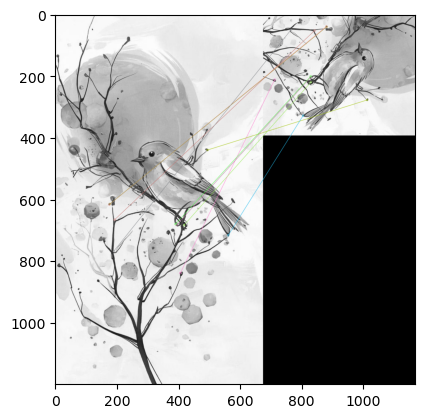

In [ ]:
from matplotlib import pyplot as plt
# Feature matching with Bryte Force ORB detector
img1 = cv2.imread("input/match1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("input/match2.jpg", cv2.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

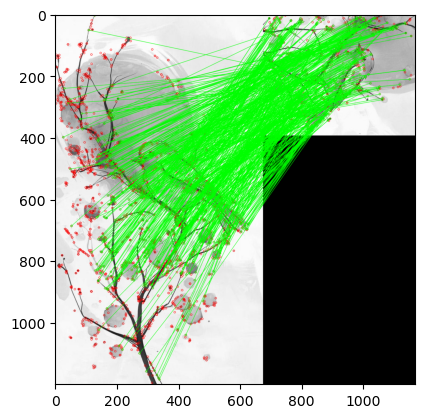

In [ ]:
# Flann matcher (another algorithm that uses SIFT)
from matplotlib import pyplot as plt

img1 = cv2.imread("input/match1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("input/match2.jpg", cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
                           matchesMask=matchesMask,flags=cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3, )
plt.show()


Flann matcher is efficient for large datasets while BF (Brute Force) matcher is slower in calculation.

<h2> 14. Face Eye Detection using HaarCascade</h2>

In [ ]:
# Importing OpenCV package
import cv2

# Reading the image, change people1, people2, people3.jpg
# It may miss 1 or 2 faces
img = cv2.imread('input/people3.jpg')

# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('input/Haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Detected faces', img)

cv2.waitKey(0)
cv2.destroyWindow('Detected faces')

<h3> The following program detects face and eye on live camera</h3>

In [ ]:
# This is a function, this is called by the next piece of code
def detectAndDisplay(frame, face_cascade, eyes_cascade):
    """Convert to gray,uses face cascase and eye cascade pretrained haar cascade to detect eyes and faces"""
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    # -- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        frame = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y + h, x:x + w]
        # -- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)
    cv2.imshow('Capture - Face detection', frame)

In [ ]:
eyes_cascade_name = "input/haarcascade_eye.xml"
face_cascade_name = "input/haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

# -- 2. Read the video stream
cap = cv2.VideoCapture(0)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame, face_cascade, eyes_cascade)
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()

Make sure that the haarcascade XML files are place in place. There are more HaarCascade files on github repository to detect other body parts or smile. You can download and use those in your code from https://github.com/kipr/opencv/tree/master/data/haarcascades